# Heart Disease Risk Prediction.


In this case study, we harness state-of-the-art machine learning techniques to systematically investigate the factors that could be associated with heart disease and heart disease risk.Through data analysis and modelling, we aim to develop predictive models for heart disease risk and elucidate the most salient predictors within this heterogeneous population (Weng et al., 2017; Dey et al., 2020).

The methodological framework for this research encompasses the following steps:


1. Problem statement
2. Gathering the Data
3. Data Cleaning and Validation
4. Exploratory Data Analysis
5. Feature Preprocessing
6. Modeling
7. Model Evaluation
8. Feature Importance
9. Model Deployment

## **1. Problem Statement:** 

Cardiovascular diseases, particularly heart disease, remain a leading cause of mortality globally (World Health Organization, 2021; Benjamin et al., 2019). Early identification of individuals at risk is critical for implementing timely interventions that can save lives and reduce healthcare costs. As a data scientist, the task is to leverage a comprehensive health dataset to predict heart disease risk and uncover the most significant contributing factors. The insights from this analysis may inform preventive health strategies, support clinical decision-making, and guide public health policies.

A thorough understanding of this problem lays the foundation for meaningful model development and impactful recommendations.

## **Project Goals:**

1. To develop an app/web capable of estimating the likelihood of heart disease in individuals based on their health and lifestyle data.
   
3. To identify and quantify the factors with the highest importance in predicting heart disease, thereby providing actionable insights for prevention and intervention.

By achieving these goals, the project aims to contribute to the broader effort of reducing the burden of heart disease through data-driven risk assessment and targeted preventive strategies.

## Importing all necessary Libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

## Data gathering

Data used for this projectt was obtained from **[Kaggle](https://www.kaggle.com/datasets/denvirgama/heart-disease)**



In [2]:
df = pd.read_csv("/kaggle/input/heart-disease/Hear Disease Dataset.csv")
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319782 entries, 0 to 319781
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319782 non-null  object 
 1   BMI               319782 non-null  float64
 2   Smoking           319782 non-null  object 
 3   AlcoholDrinking   319782 non-null  object 
 4   Stroke            319782 non-null  object 
 5   PhysicalHealth    319782 non-null  int64  
 6   MentalHealth      319782 non-null  int64  
 7   DiffWalking       319782 non-null  object 
 8   Sex               319782 non-null  object 
 9   AgeCategory       319782 non-null  object 
 10  Race              319782 non-null  object 
 11  Diabetic          319782 non-null  object 
 12  PhysicalActivity  319782 non-null  object 
 13  GenHealth         319782 non-null  object 
 14  SleepTime         319782 non-null  int64  
 15  Asthma            319782 non-null  object 
 16  KidneyDisease     31

In [4]:
df.shape

(319782, 18)

The data has 319782 rows and 18 columns.

## Data cleaning and validation.

Now the data needed for project is uploaded, it is time to clean the data and ensure it well validated before any analysis.

This is to ensure void of inconcistencies and errors hence optimal results and performing model

First we check for null values

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

I discovered that there are no null values from the dataset.

Next i check for duplicate rows

In [6]:
df.duplicated().sum()

18078

i discovered that there are 18078 dyplicate rows in the dataset. Next step is to remove them all.

In [7]:
data = df.drop_duplicates()

In [8]:
data.shape

(301704, 18)

In [9]:
data.duplicated().sum()

0

Now duplicates have been removed.

Next, I described the quantitative columns, to check for any abnormalities.

In [10]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301704.000000,301704.000000,301704.000000,301704.000000
mean,28.441870,3.572306,4.121553,7.084556
std,6.468127,8.140659,8.128285,1.467097
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


## Eploratory Data Analysis (EDA)

EDA helps to discover hidden patterns in data and uncovers relationships between variables.

Here EDA was done in 2 steps

### **1. Univariate analyis**



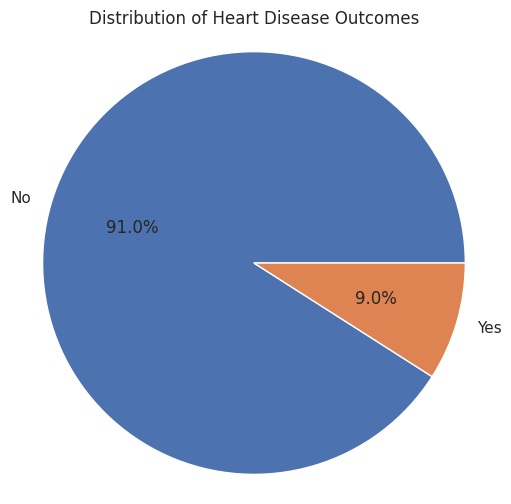

In [11]:
heart_disease=data["HeartDisease"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(heart_disease, labels=heart_disease.index, autopct='%1.1f%%')
plt.title('Distribution of Heart Disease Outcomes')
plt.axis('equal')
plt.show()

On analysis of the target variable HeartDisease, 91% of the instances are labeled as "No," indicating no presence of heart disease, while only 9% are labeled as "Yes," signifying the presence of heart disease.

The dataset predominantly consists of individuals without heart disease, highlighting the need for careful model selection and evaluation to accurately identify at-risk individuals.

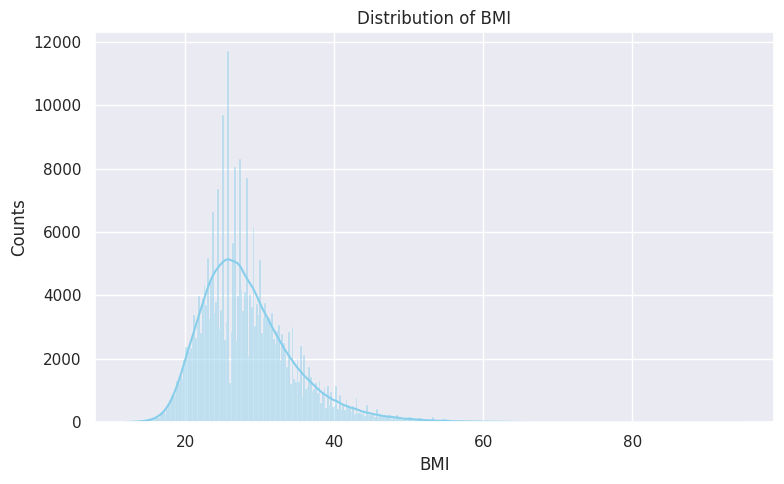

In [12]:
# Histogram for BMI
plt.figure(figsize=(8, 5))
sns.histplot(data['BMI'], kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()
   

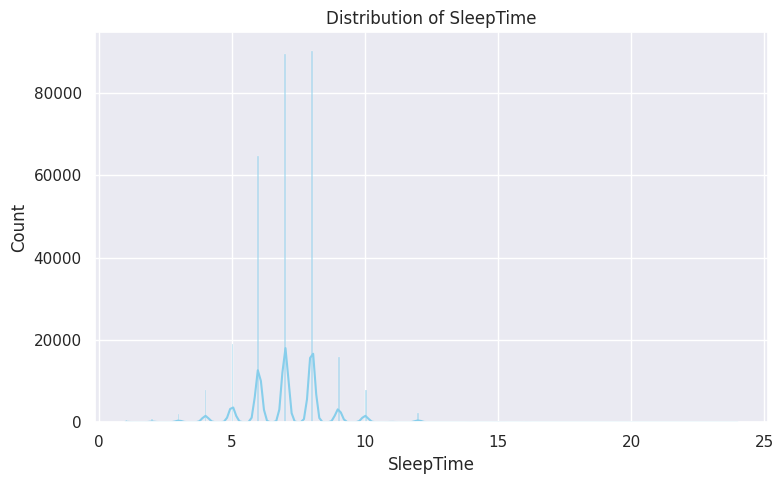

In [13]:
# Histogram for BMI
plt.figure(figsize=(8, 5))
sns.histplot(data['SleepTime'], kde=True, color='skyblue')
plt.title('Distribution of SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

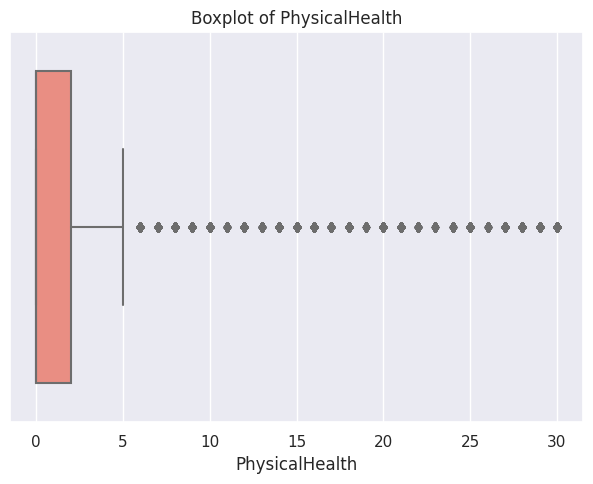

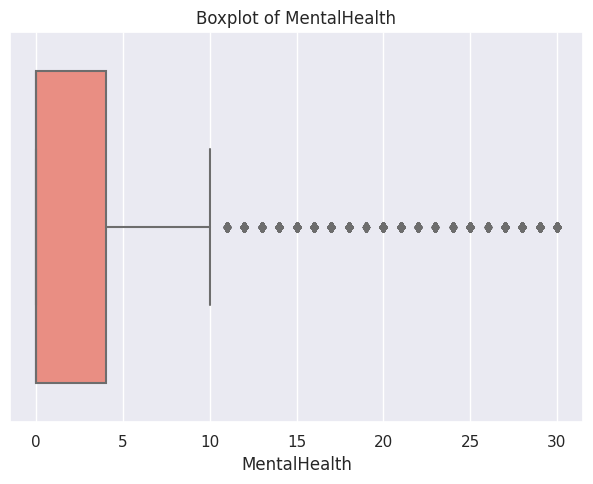

In [14]:
 # Boxplots
numerical_features = ['PhysicalHealth', 'MentalHealth']

for col in numerical_features:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Categorical Variables



Categorical features:


,Feature,Category,Count,Proportion (%)
0,Smoking,No,174304,57.77
1,Smoking,Yes,127400,42.23
2,AlcoholDrinking,No,280124,92.85
3,AlcoholDrinking,Yes,21580,7.15
4,Stroke,No,289640,96.00
5,Stroke,Yes,12064,4.00
6,PhysicalActivity,Yes,230403,76.37
7,PhysicalActivity,No,71301,23.63
8,GenHealth,Very good,104794,34.73
9,GenHealth,Good,91233,30.24


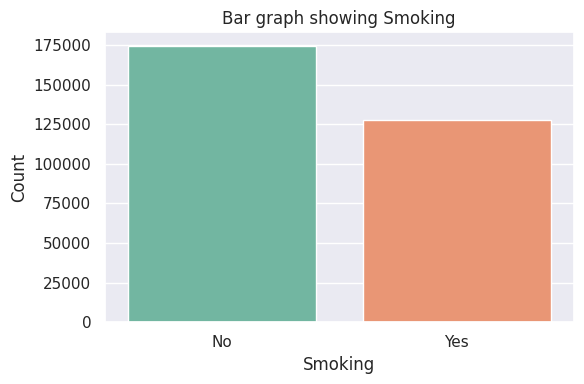

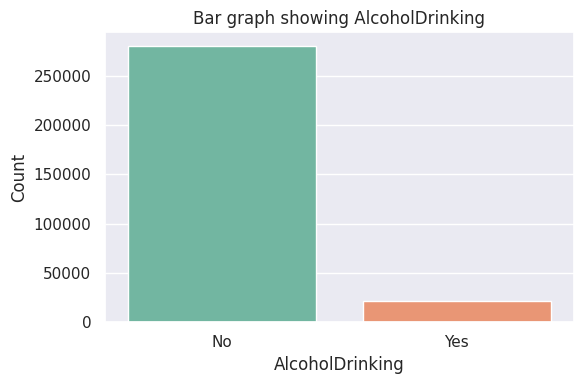

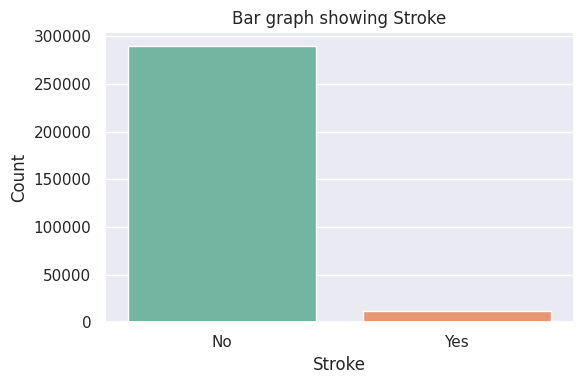

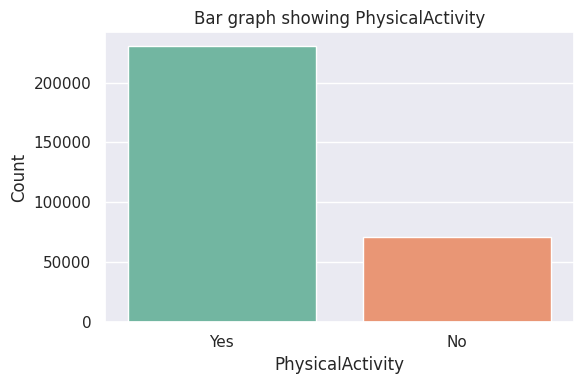

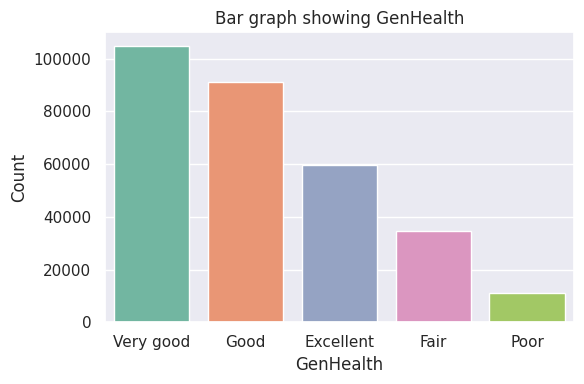

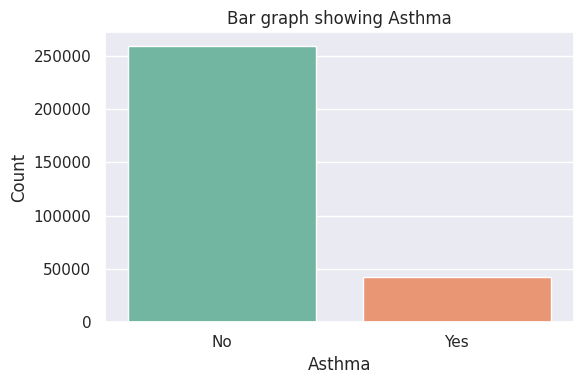

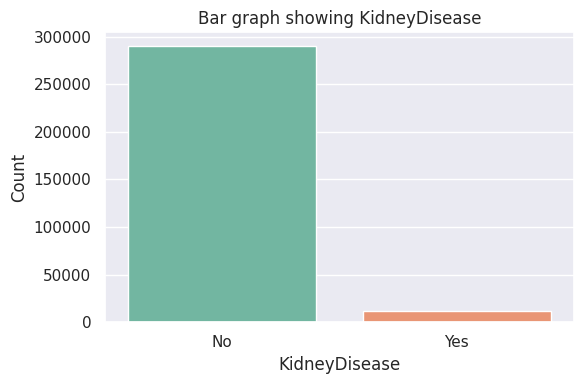

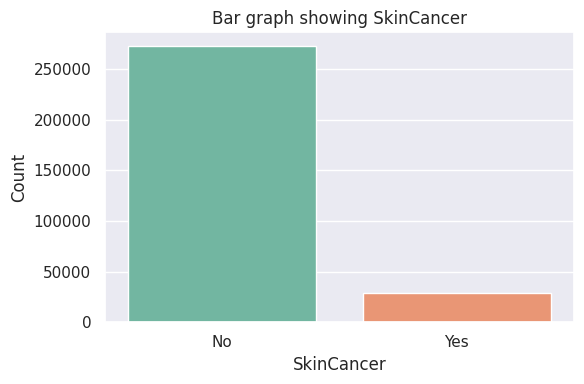

In [15]:
categoricals = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 
    'PhysicalActivity', 'GenHealth', 'Asthma', 
    'KidneyDisease', 'SkinCancer'
]

# Build summary dataframe
categoricals_list = []
for col in categoricals:
    counts = data[col].value_counts(dropna=False)
    proportions = data[col].value_counts(normalize=True, dropna=False) * 100
    for category in counts.index:
        categoricals_list.append({
            'Feature': col,
            'Category': category,
            'Count': counts[category],
            'Proportion (%)': round(proportions[category], 2)
        })

categorical_data = pd.DataFrame(categoricals_list)

# Display the dataframe
print("Categorical features:")
display(categorical_data)

# Plot each categorical variable individually
for col in categoricals:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2')
    plt.title(f'Bar graph showing {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Bivariate Analysis.

## Feature processing

Data needs to be prepared for modelling. 

In [16]:
model_data = data.copy()

In [17]:
categorical_features = model_data.select_dtypes(include=['object', 'category']).columns
categorical_data = model_data[categorical_features]
categorical_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [18]:
label = LabelEncoder()
for x in categorical_data:
    model_data[x]=label.fit_transform(model_data[x])

In [19]:
model_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319777,0,42.57,0,0,0,0,0,1,0,8,3,0,0,2,7,0,0,0
319778,0,26.63,0,0,0,0,0,0,0,1,3,0,0,4,8,0,0,0
319779,0,23.38,1,0,0,30,0,1,0,10,3,0,1,1,5,0,0,0
319780,0,30.67,0,0,0,0,8,0,0,1,3,0,1,4,7,0,0,0


## HeatMap



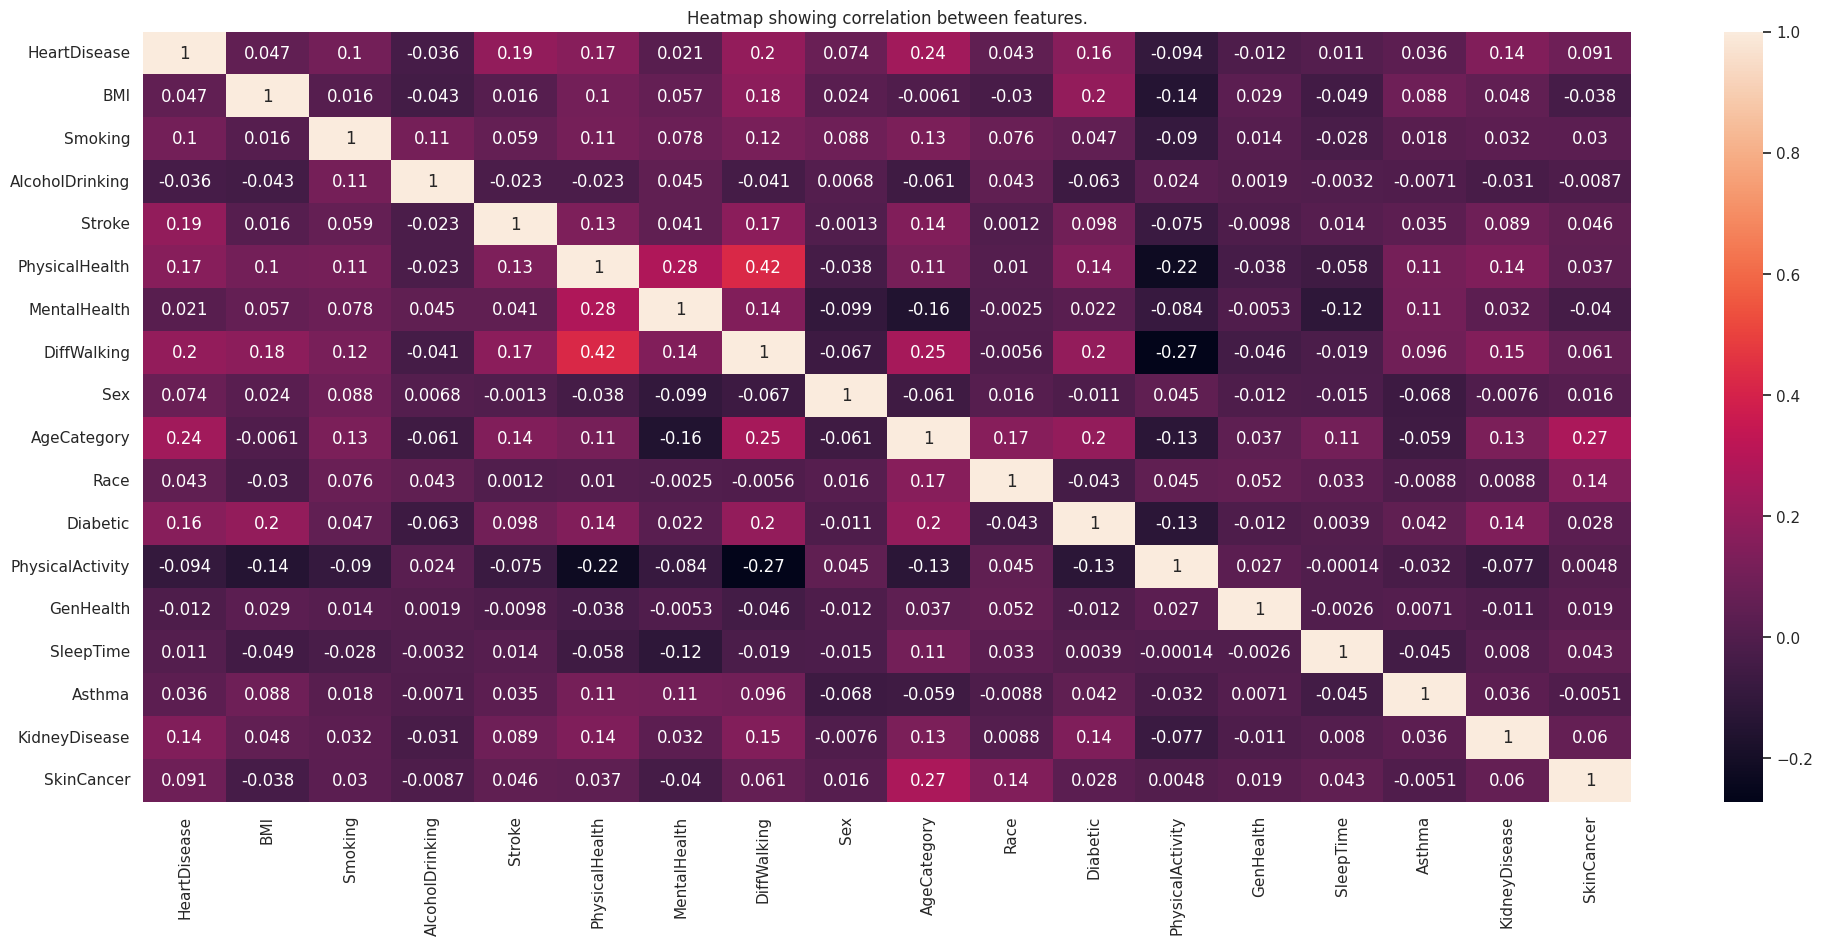

In [20]:
plt.figure(figsize=(24,10))
sns.heatmap(model_data.corr(), annot=True)
plt.title("Heatmap showing correlation between features.")
plt.show()

## Test split validation

The dataset is split into explanatory variables — X and target variable — y. Then, it further, split into train and test data in a ratio of 80:20 respectively. Splitting the data helps to assess the model’s performance on unseen data after being trained on the training data. Scikit-learn’s train-test split is used to accomplish this task.

In [21]:
x = model_data.drop(['HeartDisease','PhysicalHealth', 'MentalHealth'], axis = 1).values

In [22]:
y=model_data['HeartDisease'].values

In [23]:
x.shape

(301704, 15)

In [24]:
y.shape

(301704,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Feature Scaling

Before going into modeling proper, the data needs to be scaled to handle skewed features. Scikit-learn’s standard scaler ensures that for each feature the mean is 0 and the variance is 1, bringing all the features to the same magnitude. Doing this will significantly affect the model’s performance.

In [26]:
scaler = StandardScaler()
scaledx_train = scaler.fit_transform(x_train)
scaledx_test = scaler.transform(x_test)

## Modelling

Heart Disease prediction problem is a classification problem, therefore about three classification models were trained and the optimal model was chosen.

## 1. Logistic Regression Model

In [27]:
LogitModel = LogisticRegression()
LogitModel.fit(scaledx_train, y_train)

LogisticRegression()

In [28]:
Disease_pred = LogitModel.predict(scaledx_test)

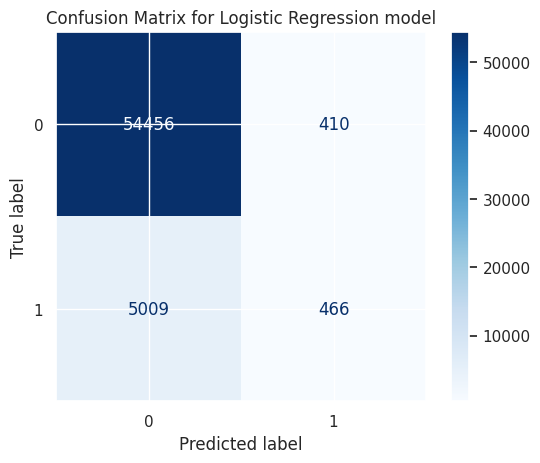

In [29]:
# Generate the confusion matrix
cm1 = confusion_matrix(y_test, Disease_pred)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=LogitModel.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression model")
plt.show()

## Random Forest Model

In [30]:
ForestModel = RandomForestClassifier(random_state = 1)
ForestModel.fit(scaledx_train, y_train)



RandomForestClassifier(random_state=1)

In [31]:
DiseasePrediction = ForestModel.predict(scaledx_test)

## Random Forest model Confusion matrix

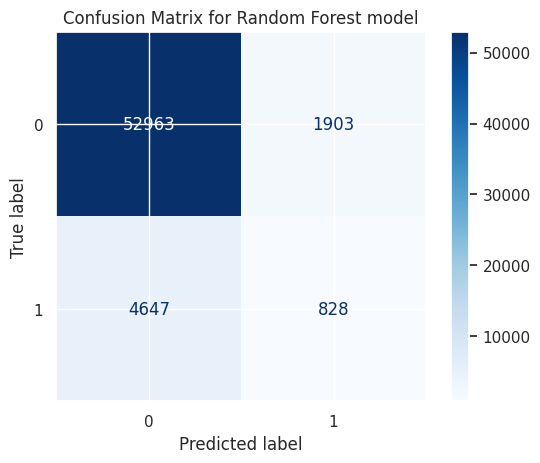

In [32]:
# Generate the confusion matrix
cm2 = confusion_matrix(y_test, DiseasePrediction)

# Display the confusion matrix as a plot
matrix = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=ForestModel.classes_)
matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest model")
plt.show()

## 3. XGBOOST MODEL

In [33]:
BoostModel = XGBClassifier(random_state = 23)
BoostModel.fit(scaledx_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=23, ...)

In [34]:
Disea_pred = BoostModel.predict(scaledx_test)

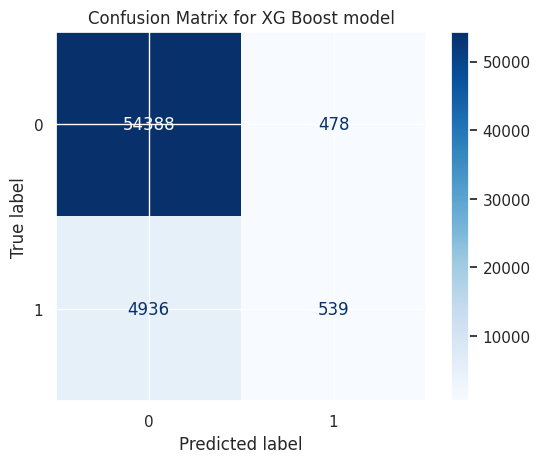

In [35]:
cm3= confusion_matrix(y_test, Disea_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=BoostModel.classes_)
matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XG Boost model")
plt.show()



## 4. Decision Tree Model


In [36]:
TreeModel = DecisionTreeClassifier(random_state = 42)
TreeModel.fit(scaledx_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
Dis_pred = TreeModel.predict(scaledx_test)

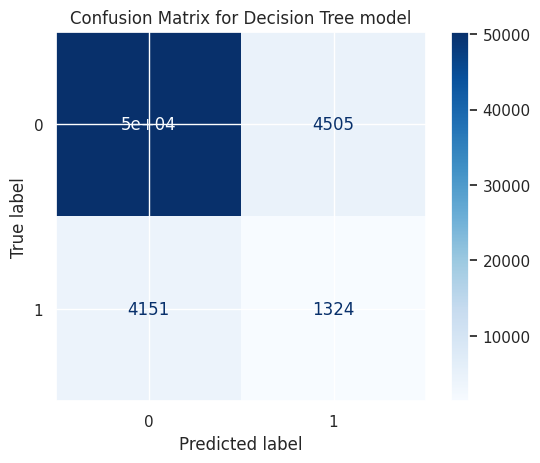

In [38]:
cm4= confusion_matrix(y_test, Dis_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=BoostModel.classes_)
matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree model")
plt.show()


## Model Evaluation.

Since the classes are highly imbalanced on the confusion Matrix we weill use F1score for all the models.

In [39]:


f1_LogitModel = f1_score(y_test, Disease_pred)
f1_ForestModel = f1_score(y_test, DiseasePrediction)
f1_BoostModel = f1_score(y_test, Disea_pred)
f1_TreeModel = f1_score(y_test, Dis_pred)

# Create a summary table
F1_scoreTable = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost","Decision Tree"],
    "F1 Score": [f1_LogitModel, f1_ForestModel,f1_BoostModel, f1_TreeModel]
})

F1_scoreTable

,Model,F1 Score
0,Logistic Regression,0.146749
1,Random Forest,0.201804
2,XGBoost,0.166051
3,Decision Tree,0.234253


**References:**

- World Health Organization. (2021). Cardiovascular diseases (CVDs). Retrieved from [https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))
- Benjamin, E. J., et al. (2019). Heart Disease and Stroke Statistics—2019 Update: A Report From the American Heart Association. *Circulation*, 139(10), e56–e528.
- Weng, S. F., Reps, J., Kai, J., Garibaldi, J. M., & Qureshi, N. (2017). Can machine-learning improve cardiovascular risk prediction using routine clinical data? *PLoS ONE*, 12(4), e0174944. https://doi.org/10.1371/journal.pone.0174944
- Dey, D., Ashour, A. S., & Shi, Y. (2020). Predicting risk of heart disease using machine learning algorithms. *SN Computer Science*, 1(6), 272. https://doi.org/10.1007/s42979-020-00271-w
- Denvirgama. (2023). Heart Disease Dataset. Kaggle. Retrieved from [https://www.kaggle.com/datasets/denvirgama/heart-disease](https://www.kaggle.com/datasets/denvirgama/heart-disease)